In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import self-made module
import os, sys, pathlib
file_path = os.path.abspath('')
PROJECT_DIR = str(pathlib.Path(file_path).parent)
sys.path.append(PROJECT_DIR)
print(f"Added {PROJECT_DIR} to PATH")
from athena import *
from sympy.vector import CoordSys3D, gradient, curl, ParametricRegion, vector_integrate, scalar_potential
from sympy.integrals.manualintegrate import integral_steps

sp.init_printing()

# ult functions
def reset_symbols():
    global x, y, z, a, b, c, d, e, f, g, h, r, s, k, t, u, v, theta, lmda, rho, phi
    x, y, z = sp.symbols('x y z', real=True)
    a, b, c, d, e, f, g, h, r, s, k, t, u, v = sp.symbols('a b c d e f g h r s k t u v', real=True)
    theta = sp.Symbol('theta')
    lmda = sp.Symbol('lambda')
    rho = sp.Symbol('rho')
    phi = sp.Symbol('phi')
    

reset_symbols()

Added D:\Dev\Code\MyMathLab to PATH


In [2]:
C = CoordSys3D('.')

alias_dict = {
    C.x : theta,
    C.y : phi,
    C.z : r,
}

vf = (C.z * sp.cos(C.x) * sp.sin(C.y)) * C.i + (C.z * sp.sin(theta) * sp.sin(phi)) * C.j + (C.z * sp.cos(phi)) * C.k
vf = vf.subs(alias_dict)

vf.diff(theta).cross(vf.diff(phi)).subs({r: 2, theta:sp.pi, phi:sp.pi/3})

In [3]:
C = CoordSys3D('.')

vf = (r * sp.cos(theta) * sp.sin(phi)) * C.i + (r * sp.sin(theta) * sp.sin(phi)) * C.j + (r * sp.cos(phi)) * C.k
vf

vf_dtheta = vf.diff(theta)
vf_dphi = vf.diff(phi)

vf_dtheta
vf_dphi


d_delta = vf_dtheta.cross(vf_dphi)
d_delta

d_delta.subs({r: 2, theta:sp.pi, phi:sp.pi/3})

In [4]:
C = CoordSys3D('.')

vf = (r * sp.cos(theta)) * C.i + (r * sp.sin(theta)) * C.j + (z) * C.k
vf

vf_dtheta = vf.diff(theta)
vf_dphi = vf.diff(z)

vf_dtheta
vf_dphi


d_delta = vf_dtheta.cross(vf_dphi)
d_delta

d_delta.subs({r: 5, theta:3*sp.pi/2, z:1})

In [5]:
C = CoordSys3D('.')

vf = (2*y-x) * C.i + (4*x + 3*y) * C.j + (x - y) * C.k
vf

vf_dtheta = vf.diff(x)
vf_dphi = vf.diff(y)

vf_dtheta
vf_dphi


d_delta = vf_dtheta.cross(vf_dphi)
d_delta

# d_delta.subs({r: 5, theta:3*sp.pi/2, z:1})

In [6]:
C = CoordSys3D('.')

vf = (r*sp.cos(theta) * sp.sin(phi)) * C.i + (r * sp.sin(theta) * sp.sin(phi)) * C.j + (r * sp.cos(phi)) * C.k
vf

vf_dtheta = vf.diff(theta)
vf_dphi = vf.diff(phi)

vf_dtheta
vf_dphi


d_delta = vf_dtheta.cross(vf_dphi)
d_delta

# d_delta.subs({r: 5, theta:3*sp.pi/2, z:1})

In [7]:
vf = ((b + a * sp.cos(s)) * sp.sin(t)) * C.i + ((b + a*sp.cos(s)) * sp.cos(t)) * C.j + (a * sp.sin(s)) * C.k
vf

vf_ds = vf.diff(s)
vf_ds

vf_dt = vf.diff(t)
vf_dt

cross_product = vf_ds.cross(vf_dt).simplify()
integrand = cross_product.magnitude().simplify().factor()
integrand

integrand.coeff

integrand = a**2 * sp.cos(s) + a*b

integrand.integrate((s, 0, sp.pi * 2), (t, 0, sp.pi * 2))

<bound method Expr.coeff of Abs(a**2*cos(s) + a*b)>

In [8]:
vf = (2*u + 3*v) * C.i + (u - 5*v) * C.j + (u + v) * C.k
vf

vf_ds = vf.diff(u)
vf_ds

vf_dt = vf.diff(v)
vf_dt

cross_product = vf_ds.cross(vf_dt).simplify()

integrand = cross_product.magnitude().simplify().factor()
integrand

integrand.integrate((u, -3, 1), (v, 0, sp.sqrt(2)))

In [9]:
vf = (sp.cos(v)) * C.i + (sp.cos(u) + v) * C.j + (sp.sin(v)) * C.k
vf

vf_ds = vf.diff(u)
vf_ds

vf_dt = vf.diff(v)
vf_dt

cross_product = vf_ds.cross(vf_dt).simplify()

integrand = cross_product.magnitude().simplify().factor()
integrand

integrand.integrate((u, 0, sp.pi), (v, 0, 2*sp.pi))

In [10]:
vf = (-4*u + 3 * v) * C.i + (2*v) * C.j + (u + 2*v) * C.k
vf

vf_ds = vf.diff(u)
vf_ds

vf_dt = vf.diff(v)
vf_dt

cross_product = vf_ds.cross(vf_dt).simplify()

integrand = cross_product.magnitude().simplify().factor()
integrand

integrand.integrate((u, -2, 2), (v, -1, 4))

In [11]:
vf = (u) * C.i + (sp.cos(u)) * C.j + (sp.sin(v)) * C.k
vf

vf_ds = vf.diff(u)
vf_ds

vf_dt = vf.diff(v)
vf_dt

cross_product = vf_ds.cross(vf_dt).simplify()

integrand = cross_product.magnitude().simplify().factor()
integrand

integrand.integrate((u, -sp.pi/2, sp.pi/2), (v, 0, sp.pi))

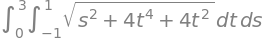

In [12]:
C = CoordSys3D('.')

t, s = sp.symbols('t s', )

v = (t**2) * C.i + (s*t) * C.j + (s) * C.k
v_dt = v.diff(t)
v_ds = v.diff(s)

cp = v_dt.cross(v_ds).magnitude()
cp

cp.integrate((t, -1, 1), (s, 0, 3)).evalf()

In [14]:
from scipy import integrate
import numpy as np

integrand = lambda t, s: np.sqrt(s**2 + 4*t**4 + 4*t**2)
integrate.dblquad(integrand, 0, 3, -1, 1)